# Ajuste de modelos (Fits)

- Polyfit (NumPy)
- Curve Fit (SciPy)

## Regresión lineal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [11]:
# Generaremos datos experimentales de manera sintética

x_exact = np.random.uniform(0.2,5.0,10)
m_exact = -28.234
b_exact = 68.02
y_exact = m_exact*x_exact + b_exact

s_Error = 7.0
y_real  = y_exact + np.random.normal(scale=s_Error,size=np.size(y_exact))


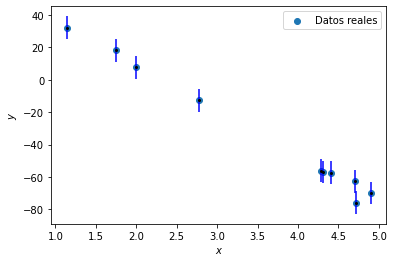

In [12]:
fig, ax = plt.subplots(1,1)
plt.scatter(x_exact,y_real,linewidth=1,label='Datos reales')
#plt.plot(x_exact,y_exact)
plt.errorbar(x_exact,y_real,yerr=s_Error,ecolor='b',fmt='ko',markersize=2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.xscale("linear")
plt.yscale("linear")
ax.legend()

## Regresión lineal simple

In [14]:
#Polyfit (solo para polinomios) https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

model1   = np.polyfit(x_exact,y_real,1) # Obtenemos parametros del modelo polinomial (m y b)
predict1 = np.poly1d(model1) # Crear el polinomio
r21      = r2_score(y_real,predict1(x_exact))

[-28.13847486  65.06313253]
0.9927619754318149


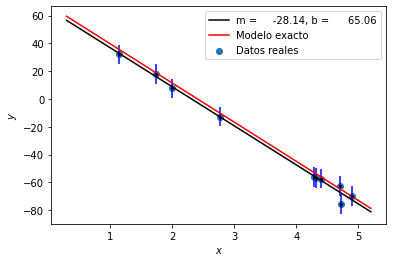

In [19]:
x = np.linspace(0.3,5.2,400)

fig, ax = plt.subplots(1,1)
plt.scatter(x_exact,y_real,linewidth=1,label='Datos reales') # Datos reales
plt.errorbar(x_exact,y_real,yerr=s_Error,ecolor='b',fmt='ko',markersize=2) # Datos reales barras error
plt.plot(x,predict1(x),c='k',label="m = {0:10.2f}, b = {1:10.2f}".format(model1[0],model1[1])) #Modelo
plt.plot(x,m_exact*x + b_exact,c='red',label="Modelo exacto")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.xscale("linear")
plt.yscale("linear")
ax.legend()

print(model1)
print(r21)

## Error asociado a los parámetros

In [20]:
# Ajuste scipy optimize
# curve_fit https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

def modelo(x,m,b):
    return m * x + b # Ajuste lineal Parámetros (m,b)

In [22]:
x_sci = x_exact
y_sci = y_real
y_err = np.zeros(len(y_sci))
p0 = [-20,70] # Primera guess

for i in np.arange(len(y_sci)):
    y_err[i] = s_Error
    
popt, pcov = curve_fit(modelo,x_sci,y_sci,p0,y_err,absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))

print("m = {0:10.3f} +- {1:10.3f}".format(popt[0],perr[0]))
print("b = {0:10.3f} +- {1:10.3f}".format(popt[1],perr[1]))

m =    -28.138 +-      1.631
b =     65.063 +-      6.118


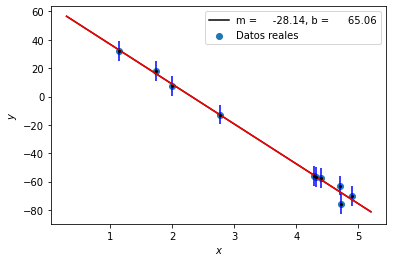

In [23]:
x = np.linspace(0.3,5.2,400)

fig, ax = plt.subplots(1,1)
plt.scatter(x_exact,y_real,linewidth=1,label='Datos reales')
plt.errorbar(x_exact,y_real,yerr=s_Error,ecolor='b',fmt='ko',markersize=2)
plt.plot(x,predict1(x),c='k',label="m = {0:10.2f}, b = {1:10.2f}".format(model1[0],model1[1]))
plt.plot(x,modelo(x,popt[0],popt[1]),color='r')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
plt.xscale("linear")
plt.yscale("linear")
ax.legend()

- import statsmodel.api as sm # dataframes (pandas)
- from scipy.optimize import minimize
- Polynomialfit